# King County Housing Market Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
linreg = LinearRegression()
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.feature_selection import RFE

In [3]:
import statsmodels.api as sm

In [4]:
data = pd.read_csv('data/kc_house_data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [8]:
data = data.drop('id', axis=1)

## Convert categoricals to int/floats

In [9]:
#cats = ['waterfront', 'grade', 'view', 'condition']

In [10]:
data['waterfront'].fillna('NO', inplace=True)

# Drop Outliers

In [11]:
data.loc[data['bedrooms'] > 6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,NO,FAIR,Average,11 Excellent,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697
1134,1/5/2015,420000.0,7,3.00,2940,8624,1.0,NO,NONE,Average,8 Good,1690,1250.0,1977,NaN,98155,47.7555,-122.307,1850,8031
1239,6/23/2014,350000.0,7,3.00,2800,9569,1.0,NO,AVERAGE,Average,7 Average,1400,1400.0,1963,0.0,98056,47.5102,-122.183,2150,7333
1658,12/4/2014,490000.0,8,5.00,2800,2580,2.0,NO,NONE,Average,8 Good,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
3717,1/15/2015,884900.0,7,4.75,5370,10800,1.5,NO,NONE,Average,8 Good,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18808,10/20/2014,539000.0,7,2.25,2620,6890,2.0,NO,NONE,Good,7 Average,2620,0.0,1961,0.0,98007,47.6123,-122.134,2070,7910
18960,6/20/2014,1240000.0,7,5.50,6630,13782,2.0,NO,NONE,Average,10 Very Good,4930,1700.0,2004,NaN,98006,47.5399,-122.118,4470,8639
19239,12/29/2014,660000.0,10,3.00,2920,3745,2.0,NO,NONE,Good,7 Average,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745
19287,11/25/2014,575000.0,8,3.00,3840,15990,1.0,NO,NONE,Average,7 Average,2530,1310.0,1961,0.0,98034,47.7111,-122.211,1380,8172


In [12]:
data.loc[data['bathrooms'] > 6]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4020,10/7/2014,800000.0,7,6.75,7480,41664,2.0,NO,AVERAGE,Average,11 Excellent,5080,2400.0,1953,NaN,98166,47.4643,-122.368,2810,33190
7245,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,YES,EXCELLENT,Average,12 Luxury,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
8537,8/11/2014,450000.0,9,7.50,4050,6504,2.0,NO,NONE,Average,7 Average,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
9245,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,NO,EXCELLENT,Average,12 Luxury,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800
14542,6/11/2014,2890000.0,5,6.25,8670,64033,2.0,NO,EXCELLENT,Average,13 Mansion,6120,2550.0,1965,NaN,98177,47.7295,-122.372,4140,81021
18288,7/2/2014,3300000.0,5,6.25,8020,21738,2.0,NO,NONE,Average,11 Excellent,8020,0.0,2001,NaN,98006,47.5675,-122.189,4160,18969
20562,3/28/2015,1180000.0,6,6.50,6260,10955,2.0,NO,NONE,Average,11 Excellent,4840,1420.0,2007,0.0,98075,47.5947,-122.039,2710,12550
21490,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,NO,NONE,Average,12 Luxury,6420,850.0,2010,NaN,98027,47.5371,-121.982,1800,44890


In [13]:
data.loc[data['sqft_living'] > 6000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
419,7/10/2014,1550000.0,5,4.25,6070,171626,2.0,NO,NONE,Average,12 Luxury,6070,0.0,1999,0.0,98024,47.5954,-121.950,4680,211267
527,6/18/2014,1600000.0,6,5.00,6050,230652,2.0,NO,GOOD,Average,11 Excellent,6050,0.0,2001,0.0,98024,47.6033,-121.943,4210,233971
577,12/11/2014,930000.0,4,4.00,6050,84942,2.5,NO,AVERAGE,Average,9 Better,4150,1900.0,2009,0.0,98077,47.7466,-122.029,2700,199504
1099,11/10/2014,1570000.0,5,4.50,6070,14731,2.0,NO,NONE,Average,11 Excellent,6070,0.0,2004,NaN,98059,47.5306,-122.134,4750,13404
1162,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,YES,EXCELLENT,Average,12 Luxury,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20562,3/28/2015,1180000.0,6,6.50,6260,10955,2.0,NO,NONE,Average,11 Excellent,4840,1420.0,2007,0.0,98075,47.5947,-122.039,2710,12550
20822,8/28/2014,1280000.0,6,5.25,6160,27490,2.0,NO,NONE,Average,11 Excellent,4040,2120.0,2007,0.0,98074,47.6094,-122.023,4225,9100
21034,2/19/2015,900000.0,5,6.00,7120,40806,2.0,NO,EXCELLENT,Average,12 Luxury,5480,1640.0,2007,0.0,98006,47.5451,-122.114,3440,36859
21328,8/22/2014,1490000.0,5,6.00,6880,279968,2.0,NO,GOOD,Average,12 Luxury,4070,2810.0,2007,0.0,98045,47.4624,-121.779,4690,256803


In [14]:
data.loc[data['sqft_lot'] > 750000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,3/27/2015,700000.0,4,1.00,1300,1651359,1.0,NO,GOOD,Good,6 Low Average,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
3945,9/5/2014,998000.0,4,3.25,3770,982998,2.0,NO,NONE,Average,10 Very Good,3770,0.0,1992,0.0,98058,47.4140,-122.087,2290,37141
4437,7/30/2014,790000.0,2,3.00,2560,982278,1.0,NO,NONE,Average,8 Good,2560,0.0,2004,0.0,98014,47.6955,-121.861,1620,40946
4536,9/29/2014,550000.0,3,2.00,3650,843309,2.0,NO,NONE,Good,7 Average,3650,0.0,1991,NaN,98070,47.3627,-122.496,1870,273992
6685,3/20/2015,2000000.0,2,2.50,3900,920423,2.0,NO,NONE,Average,12 Luxury,3900,0.0,2009,0.0,98065,47.5371,-121.756,2720,411962
7070,1/5/2015,1650000.0,4,3.25,3920,881654,3.0,NO,GOOD,Average,11 Excellent,3920,?,2002,NaN,98024,47.5385,-121.896,2970,112384
7640,5/21/2014,542500.0,5,3.25,3010,1074218,1.5,NO,NONE,Very Good,8 Good,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
7762,1/19/2015,855000.0,4,3.50,4030,1024068,2.0,NO,NONE,Average,10 Very Good,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
9705,1/7/2015,937500.0,4,4.00,5545,871200,2.0,NO,NONE,Average,11 Excellent,3605,1940.0,2003,0.0,98014,47.6760,-121.882,3420,871200
17305,5/4/2015,190000.0,2,1.00,710,1164794,1.0,NO,NONE,Fair,5 Fair,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


In [15]:
data.drop(data.loc[(data['sqft_living'] > 6000 ) | (data['bedrooms'] > 6) | (data['bathrooms'] > 6) | (data['sqft_lot'] > 750000)].index, inplace=True)

In [16]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Grade

In [17]:
data.grade.value_counts()

7 Average        8948
8 Good           6046
9 Better         2607
6 Low Average    2036
10 Very Good     1123
11 Excellent      369
5 Fair            241
12 Luxury          61
4 Low              27
13 Mansion          3
3 Poor              1
Name: grade, dtype: int64

In [18]:
data['grade'] = data['grade'].str[:2]
data.grade = data.grade.astype(float)

In [19]:
data.grade

0        7.0
1        7.0
2        6.0
3        7.0
4        8.0
        ... 
21592    8.0
21593    8.0
21594    7.0
21595    8.0
21596    7.0
Name: grade, Length: 21462, dtype: float64

### View

In [20]:
data.view.value_counts()

NONE         19334
AVERAGE        944
GOOD           495
FAIR           325
EXCELLENT      302
Name: view, dtype: int64

In [21]:
#Some values are missing and are liekly none (the mode and possibly skipped because of it being none). 
data.view = data.view.fillna('NONE')

In [22]:
view_data = pd.get_dummies(data['view'], prefix='view', drop_first=True)

In [23]:
view_data

,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
21592,0,0,0,1
21593,0,0,0,1
21594,0,0,0,1
21595,0,0,0,1


### Floors

In [24]:
#floors look good.
data.floors.value_counts()

1.0    10646
2.0     8152
1.5     1901
3.0      606
2.5      151
3.5        6
Name: floors, dtype: int64

### Waterfront

In [25]:
data.waterfront.value_counts()

NO     21324
YES      138
Name: waterfront, dtype: int64

In [26]:
#Convert no to 0, yes to 1

In [27]:
data.waterfront = (data['waterfront'] == 'YES').astype(int)

In [28]:
data.waterfront.value_counts()

0    21324
1      138
Name: waterfront, dtype: int64

### Condition

In [29]:
#data.condition.value_counts()

In [30]:
condition_data = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)

In [31]:
#condition_data       

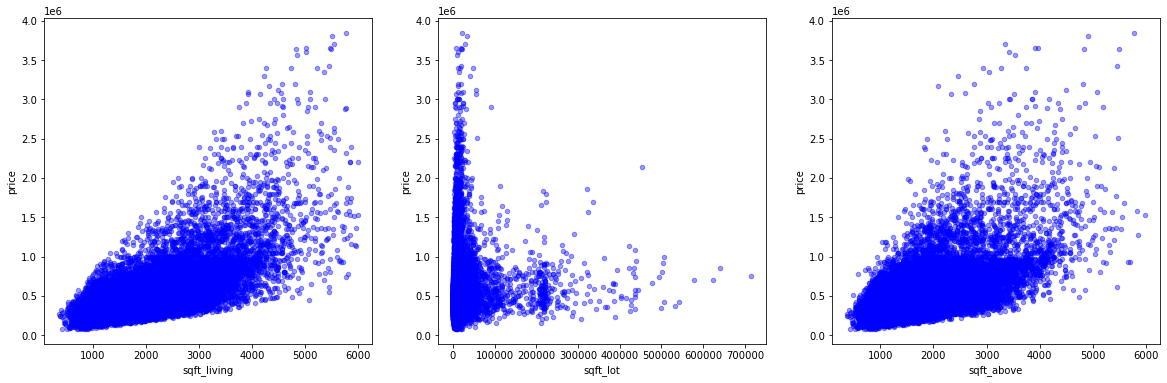

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

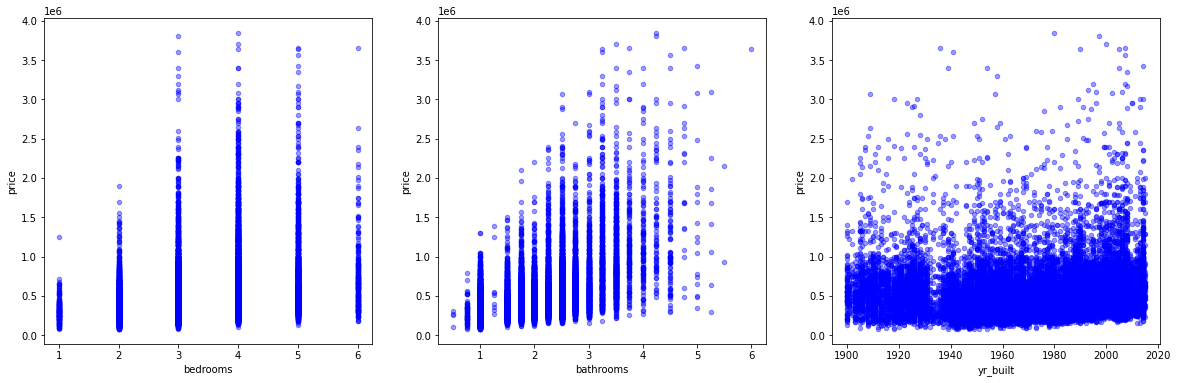

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

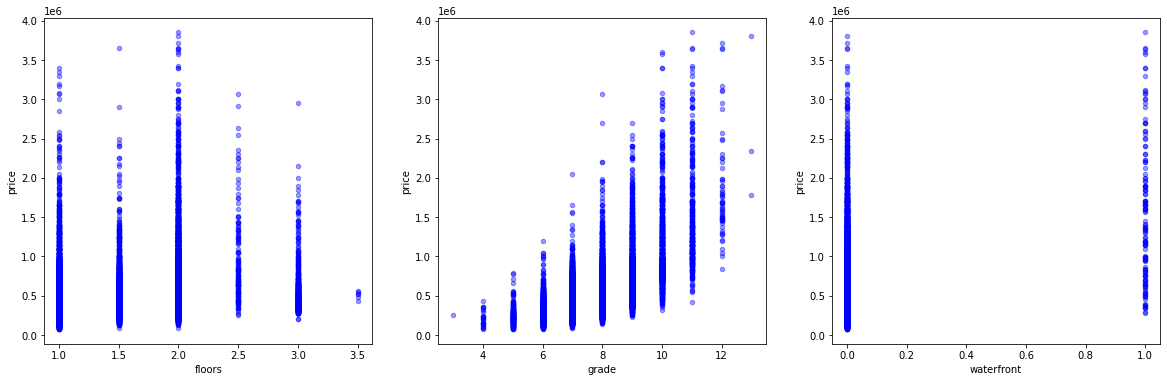

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

for xcol, ax in zip(['floors', 'grade', 'waterfront'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

## Join DataFrames

In [35]:
data = pd.concat([data, condition_data], axis=1)
data = pd.concat([data, view_data], axis=1)

In [36]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,cond_Fair,cond_Good,cond_Poor,cond_Very Good,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,...,1340,5650,0,0,0,0,0,0,0,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,...,1690,7639,0,0,0,0,0,0,0,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,...,2720,8062,0,0,0,0,0,0,0,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,...,1360,5000,0,0,0,1,0,0,0,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,...,1800,7503,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,...,1530,1509,0,0,0,0,0,0,0,1
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,...,1830,7200,0,0,0,0,0,0,0,1
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,...,1020,2007,0,0,0,0,0,0,0,1
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,...,1410,1287,0,0,0,0,0,0,0,1


### Set X and y

In [37]:
#y = data['price']
#categoricals = ['waterfront', 'zipcode', 'view', 'grade']
#X = data[['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms', 'yr_built','floors', 'zipcode', 'grade', 'waterfront']]
#X = data[['sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms', 'yr_built', 'floors', 'grade', 'waterfront', 'cond_Fair', 'cond_Good', 'cond_Poor', 'cond_Very Good']]
#X = ['floors', 'waterfront', 'yr_built', 'zipcode', 'view', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above', 'bedrooms', 'bathrooms']
#convert view, grade, 'sqft_basement' - add to cont


In [38]:
#data['bed+bath'] = data['bedrooms'] * data['bathrooms']

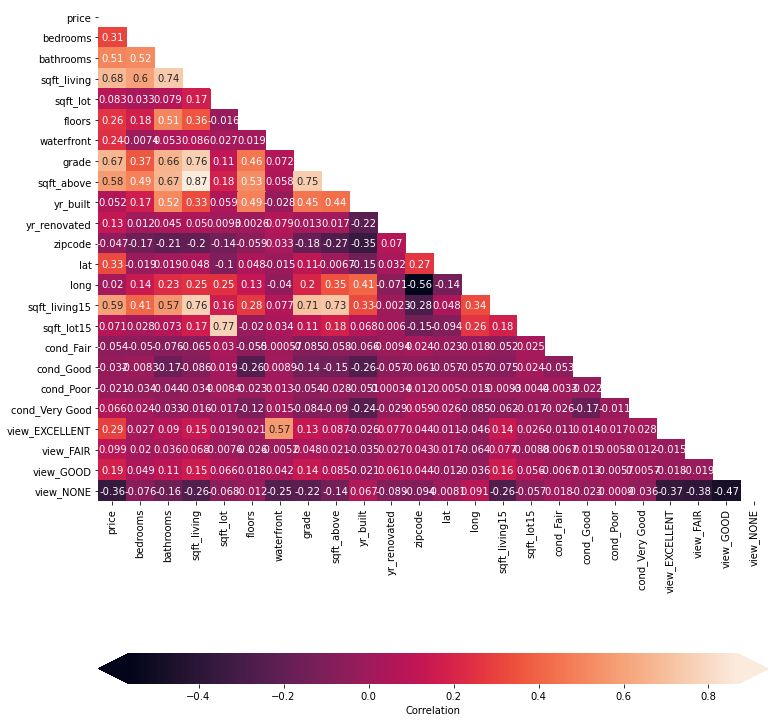

In [39]:
heatmap_data = data
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

# Drop unneeded columns

In [40]:
unneeded = ['sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
            'sqft_lot15', 'view', 'condition', 'sqft_basement', 'zipcode', 'date']

In [41]:
prelim_X = data.drop(unneeded, axis=1)
X = prelim_X.drop('price', axis=1)
y = data['price']

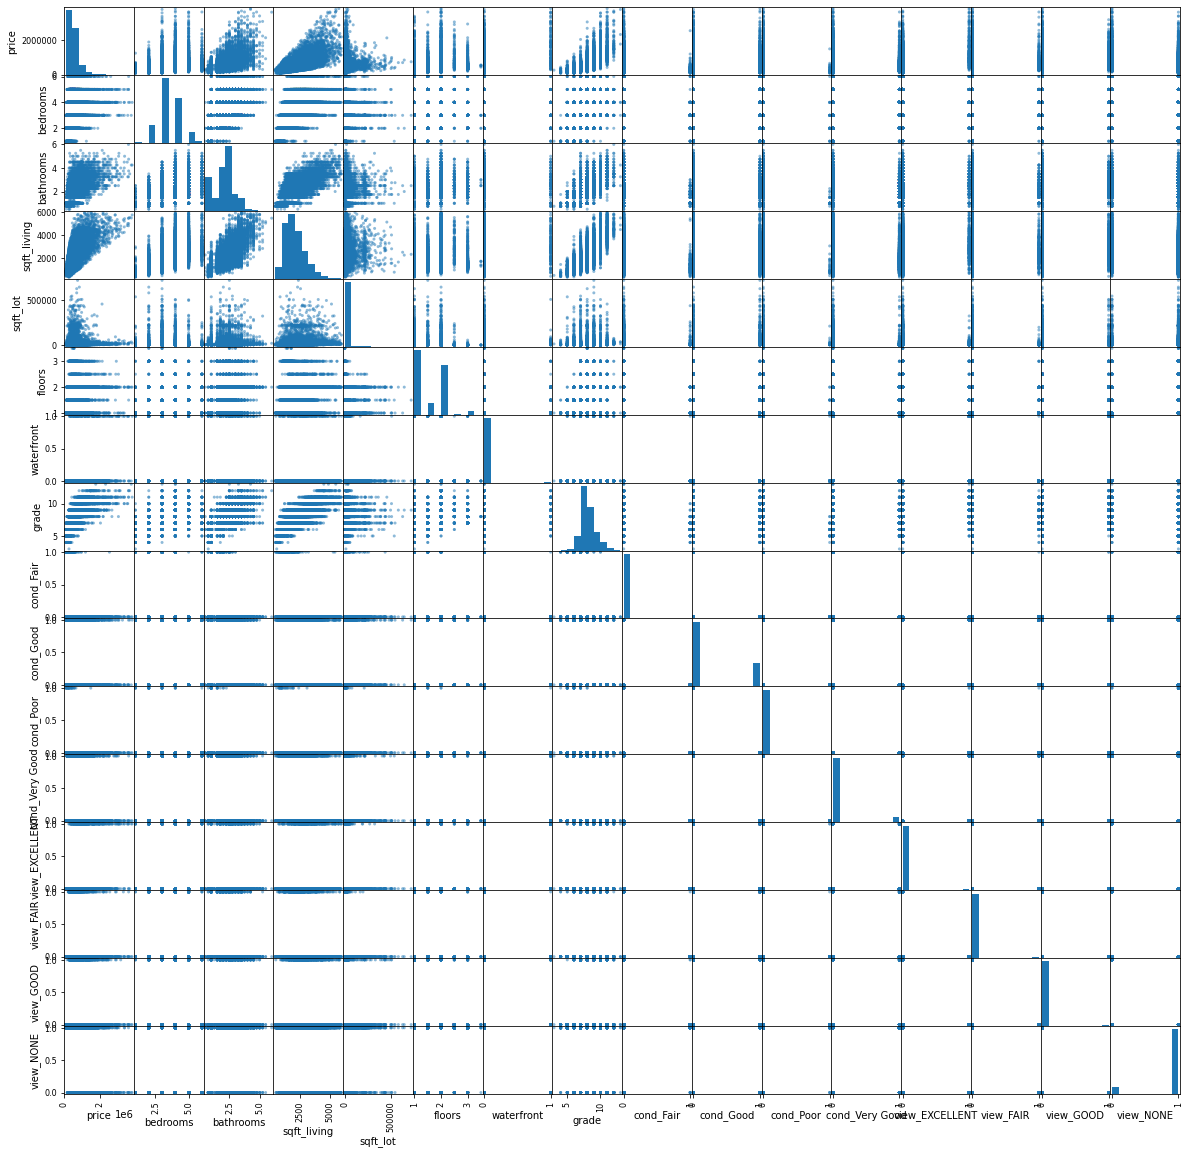

In [42]:
pd.plotting.scatter_matrix(prelim_X, figsize=(20,20));

In [43]:
#outcome = 'price'
#x_cols = ['sqft_living', 'grade', 'bedrooms']
#predictors = '+'.join(x_cols)
#formula = outcome + '~' + predictors
#model = ols(formula=formula, data=data).fit()
#model.summary()

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21462 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        21462 non-null  int64  
 1   bathrooms       21462 non-null  float64
 2   sqft_living     21462 non-null  int64  
 3   sqft_lot        21462 non-null  int64  
 4   floors          21462 non-null  float64
 5   waterfront      21462 non-null  int32  
 6   grade           21462 non-null  float64
 7   cond_Fair       21462 non-null  uint8  
 8   cond_Good       21462 non-null  uint8  
 9   cond_Poor       21462 non-null  uint8  
 10  cond_Very Good  21462 non-null  uint8  
 11  view_EXCELLENT  21462 non-null  uint8  
 12  view_FAIR       21462 non-null  uint8  
 13  view_GOOD       21462 non-null  uint8  
 14  view_NONE       21462 non-null  uint8  
dtypes: float64(3), int32(1), int64(3), uint8(8)
memory usage: 1.4 MB


In [45]:
#predictors = '+'.join(X)
#formula = y + '~' + predictors
#model = ols(formula=formula, data=X).fit()
#model.summary()

In [46]:
model = sm.OLS(endog=y, exog=X).fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.054e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:18   Log-Likelihood:                     -2.9422e+05
No. Observations:               21462   AIC:                                  5.885e+05
Df Residuals:                   21447   BIC:                                  5.886e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms       -5.353e+04   2058.469    -26.005      0.000   -5.76e+04   -4.95e+04
bathrooms      -6050.2644   3320.977     -1.822      0.068   -1.26e+04     459.097
sqft_living      208.1148      3.120     66.713      0.000     202.000     214.229
sqft_lot          -0.4942      0.045    -11.008      0.000      -0.582      -0.406
floors         -9517.9772   3421.964     -2.781      0.005   -1.62e+04   -2810.672
waterfront      4.173e+05   2.27e+04     18.410      0.000    3.73e+05    4.62e+05
grade           6.308e+04   1378.402     45.764      0.000    6.04e+04    6.58e+04
cond_Fair      -2327.2350   1.69e+04     -0.138      0.890   -3.54e+04    3.08e+04
cond_Good       3.122e+04   3554.944      8.782      0.000    2.43e+04    3.82e+04
cond_Poor       2.541e+04   4.05e+04      0.627      0.530    -5.4e+04    1.05e+05
cond_Very Good  1.089e+05   5661.923     19.234      0.000    9.78e+04     1.2e+05
view_EXCELLENT  1.929e+05   1.66e+04     11.592      0.000     1.6e+05    2.25e+05
view_FAIR      -3.876e+04   1.36e+04     -2.853      0.004   -6.54e+04   -1.21e+04
view_GOOD      -1.012e+04   1.17e+04     -0.862      0.389   -3.31e+04    1.29e+04
view_NONE      -2.017e+05   6430.184    -31.364      0.000   -2.14e+05   -1.89e+05
==============================================================================
Omnibus:                    10185.789   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127207.201
Skew:                           1.964   Prob(JB):                         0.00
Kurtosis:                      14.262   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
'''
It appears that bathrooms, cond_Fair, cond_Poor, and view_GOOD have high p-values.
'''

'\nIt appears that bathrooms, cond_Fair, cond_Poor, and view_GOOD have high p-values.\n'

In [49]:
pdrop = ['cond_Fair', 'cond_Poor', 'bathrooms', 'view_GOOD']

In [50]:
X2 = X.drop(pdrop, axis=1)

In [51]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21462 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        21462 non-null  int64  
 1   sqft_living     21462 non-null  int64  
 2   sqft_lot        21462 non-null  int64  
 3   floors          21462 non-null  float64
 4   waterfront      21462 non-null  int32  
 5   grade           21462 non-null  float64
 6   cond_Good       21462 non-null  uint8  
 7   cond_Very Good  21462 non-null  uint8  
 8   view_EXCELLENT  21462 non-null  uint8  
 9   view_FAIR       21462 non-null  uint8  
 10  view_NONE       21462 non-null  uint8  
dtypes: float64(2), int32(1), int64(3), uint8(5)
memory usage: 1.2 MB


In [52]:
model2 = sm.OLS(endog=y, exog=X2).fit()

In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.438e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:18   Log-Likelihood:                     -2.9422e+05
No. Observations:               21462   AIC:                                  5.885e+05
Df Residuals:                   21451   BIC:                                  5.886e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms       -5.434e+04   2017.993    -26.928      0.000   -5.83e+04   -5.04e+04
sqft_living      205.7554      2.752     74.755      0.000     200.360     211.150
sqft_lot          -0.4926      0.045    -10.996      0.000      -0.580      -0.405
floors         -1.151e+04   3235.983     -3.557      0.000   -1.79e+04   -5168.202
waterfront      4.162e+05   2.26e+04     18.389      0.000    3.72e+05    4.61e+05
grade           6.236e+04   1294.059     48.189      0.000    5.98e+04    6.49e+04
cond_Good       3.157e+04   3527.448      8.950      0.000    2.47e+04    3.85e+04
cond_Very Good  1.088e+05   5653.855     19.237      0.000    9.77e+04     1.2e+05
view_EXCELLENT   1.97e+05   1.61e+04     12.215      0.000    1.65e+05    2.29e+05
view_FAIR      -3.543e+04   1.31e+04     -2.695      0.007   -6.12e+04   -9663.413
view_NONE      -1.984e+05   5512.452    -35.998      0.000   -2.09e+05   -1.88e+05
==============================================================================
Omnibus:                    10179.366   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126652.958
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      14.234   Cond. No.                     6.17e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

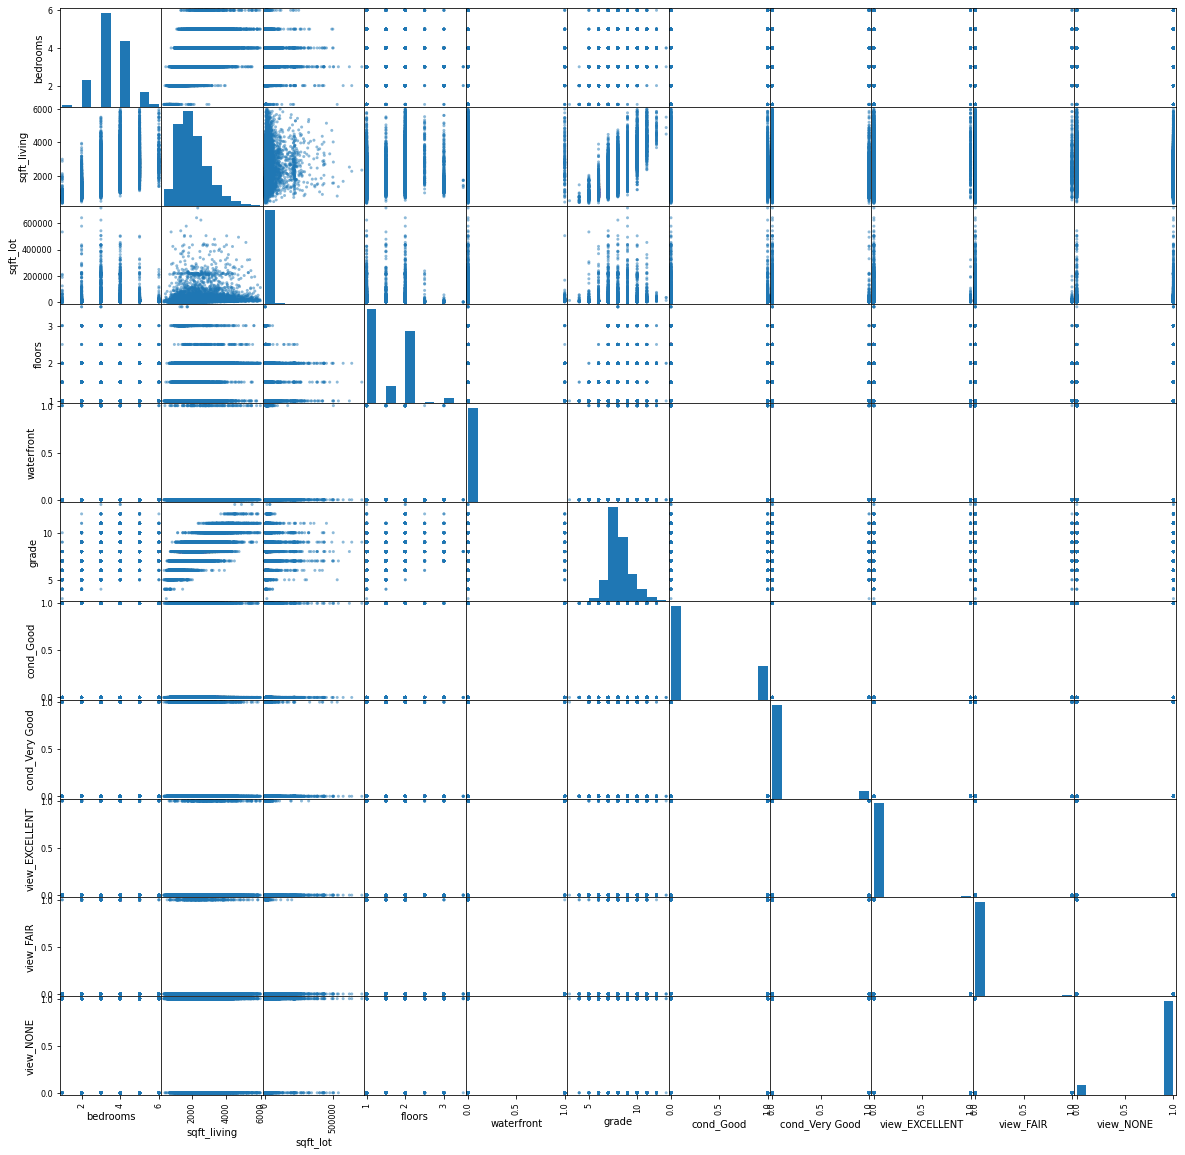

In [54]:
pd.plotting.scatter_matrix(X2, figsize=(20,20));

In [55]:
#sm.graphics.plot_regress_exog(model2, 'bedrooms', fig=plt.figure(figsize=(12, 8)));

In [56]:
#sm.graphics.plot_regress_exog(model2, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

In [57]:
#sm.graphics.plot_regress_exog(model2, 'sqft_lot', fig=plt.figure(figsize=(12, 8)));

In [58]:
#sm.graphics.plot_regress_exog(model2, 'floors', fig=plt.figure(figsize=(12, 8)));

In [59]:
#sm.graphics.plot_regress_exog(model2, 'waterfront', fig=plt.figure(figsize=(12, 8)));

In [60]:
#sm.graphics.plot_regress_exog(model2, 'grade', fig=plt.figure(figsize=(12, 8)));

In [61]:
#sm.graphics.plot_regress_exog(model2, 'cond_Good', fig=plt.figure(figsize=(12, 8)));

In [62]:
#sm.graphics.plot_regress_exog(model2, 'cond_Very Good', fig=plt.figure(figsize=(12, 8)));

In [63]:
np.std(X2)

bedrooms              0.871812
sqft_living         866.875786
sqft_lot          33906.129761
floors                0.539061
waterfront            0.079929
grade                 1.151781
cond_Good             0.440325
cond_Very Good        0.269557
view_EXCELLENT        0.117785
view_FAIR             0.122122
view_NONE             0.294952
dtype: float64

# Log 

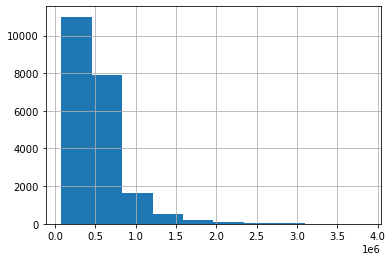

In [64]:
y.hist();

In [65]:
y_log = np.log(y)

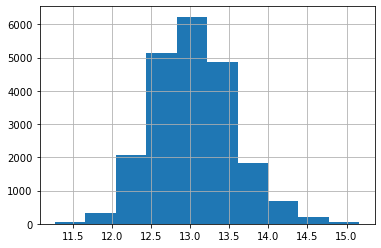

In [66]:
y_log.hist();

In [67]:
#X2_log = np.log(X2)

In [68]:
#np.std(X2_log)

# Standard Scaling

In [69]:
Xscaled = (X2 - np.mean(X2)) / np.std(X2)
yscaled = (y - np.mean(y)) / np.std(y)

In [70]:
Xscaled.describe()

,bedrooms,sqft_living,sqft_lot,floors,waterfront,grade,cond_Good,cond_Very Good,view_EXCELLENT,view_FAIR,view_NONE
count,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04,2.146200e+04
mean,1.509680e-16,-2.542619e-16,1.589137e-17,-1.906964e-16,-8.607824e-18,-2.118849e-17,9.005108e-17,-3.443129e-17,-3.972842e-17,3.707986e-17,-1.589137e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.702019e+00,-1.949528e+00,-4.102129e-01,-9.124126e-01,-8.044614e-02,-4.032158e+00,-5.975501e-01,-2.926416e-01,-1.194664e-01,-1.239995e-01,-3.064015e+00
25%,-4.079458e-01,-7.382814e-01,-2.769036e-01,-9.124126e-01,-8.044614e-02,-5.592747e-01,-5.975501e-01,-2.926416e-01,-1.194664e-01,-1.239995e-01,3.263691e-01
50%,-4.079458e-01,-1.730332e-01,-2.014011e-01,1.512620e-02,-8.044614e-02,-5.592747e-01,-5.975501e-01,-2.926416e-01,-1.194664e-01,-1.239995e-01,3.263691e-01
75%,7.390911e-01,5.537145e-01,-1.129215e-01,9.426650e-01,-8.044614e-02,3.089462e-01,1.673500e+00,-2.926416e-01,-1.194664e-01,-1.239995e-01,3.263691e-01
max,3.033165e+00,4.533523e+00,2.068243e+01,3.725281e+00,1.243068e+01,4.650050e+00,1.673500e+00,3.417149e+00,8.370557e+00,8.064547e+00,3.263691e-01


In [71]:
Xscaled_const = sm.add_constant(Xscaled)
model_scaled = sm.OLS(y_log, Xscaled_const).fit()

In [72]:
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2714.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:52:31   Log-Likelihood:                -6976.3
No. Observations:               21462   AIC:                         1.398e+04
Df Residuals:                   21450   BIC:                         1.407e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0417      0.002   5703.172      0.000      13.037      13.046
bedrooms          -0.0208      0.003     -7.097      0.000      -0.027      -0.015
sqft_living        0.1883      0.004     44.209      0.000       0.180       0.197
sqft_lot          -0.0102      0.002     -4.362      0.000      -0.015      -0.006
floors             0.0131      0.003      4.877      0.000       0.008       0.018
waterfront         0.0255      0.003      9.155      0.000       0.020       0.031
grade              0.2130      0.004     56.561      0.000       0.206       0.220
cond_Good          0.0373      0.002     15.315      0.000       0.033       0.042
cond_Very Good     0.0595      0.002     25.043      0.000       0.055       0.064
view_EXCELLENT     0.0199      0.003      6.779      0.000       0.014       0.026
view_FAIR          0.0075      0.003      2.967      0.003       0.003       0.012
view_NONE         -0.0531      0.003    -19.034      0.000      -0.059      -0.048
==============================================================================
Omnibus:                       14.580   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.620
Skew:                           0.033   Prob(JB):                      0.00110
Kurtosis:                       2.896   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# not scaled in summary below

In [74]:
#model_scaled2 = sm.OLS(y_log, Xscaled).fit()

In [75]:
#model_scaled2.summary()

In [76]:
#Xscaled_const = sm.add_constant(Xscaled)
#model_scaled3 = sm.OLS(y_log, X2).fit()
#model_scaled3.summary()

## Recursive Feature 

In [77]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)

In [78]:
select.fit(X=Xscaled_const, y=y)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [79]:
select.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [80]:
select.ranking_

array([12,  7,  1,  9, 10,  3,  2,  8,  5,  6, 11,  4])

In [81]:
one = Xscaled['sqft_living']
two = Xscaled[['sqft_living', 'grade']]
three = Xscaled[['sqft_living', 'grade', 'waterfront']]
four = Xscaled[['sqft_living', 'grade', 'waterfront', 'view_NONE']]
five = Xscaled[['sqft_living', 'grade', 'waterfront', 'view_NONE', 'cond_Very Good']]
six = Xscaled[['sqft_living', 'grade', 'waterfront', 'view_NONE', 'cond_Very Good', 'view_EXCELLENT']]
seven = Xscaled_const[['sqft_living', 'grade', 'waterfront', 'view_NONE', 'cond_Very Good', 'view_EXCELLENT', 'bedrooms']]


In [82]:
six

,sqft_living,grade,waterfront,view_NONE,cond_Very Good,view_EXCELLENT
0,-1.015138,-0.559275,-0.080446,0.326369,-0.292642,-0.119466
1,0.588322,-0.559275,-0.080446,0.326369,-0.292642,-0.119466
2,-1.488100,-1.427495,-0.080446,0.326369,-0.292642,-0.119466
3,-0.115355,-0.559275,-0.080446,0.326369,3.417149,-0.119466
4,-0.438354,0.308946,-0.080446,0.326369,-0.292642,-0.119466
...,...,...,...,...,...,...
21592,-0.611389,0.308946,-0.080446,0.326369,-0.292642,-0.119466
21593,0.288394,0.308946,-0.080446,0.326369,-0.292642,-0.119466
21594,-1.199709,-0.559275,-0.080446,0.326369,-0.292642,-0.119466
21595,-0.530639,0.308946,-0.080446,0.326369,-0.292642,-0.119466


In [83]:
model1 = sm.OLS(yscaled, one).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                          1.835e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -23822.
No. Observations:               21462   AIC:                                  4.765e+04
Df Residuals:                   21461   BIC:                                  4.765e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.6789      0.005    135.470      0.000       0.669       0.689
==============================================================================
Omnibus:                    11433.750   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159227.732
Skew:                           2.250   Prob(JB):                         0.00
Kurtosis:                      15.562   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
model2 = sm.OLS(yscaled, two).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.517
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                          1.149e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -22642.
No. Observations:               21462   AIC:                                  4.529e+04
Df Residuals:                   21460   BIC:                                  4.530e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.4034      0.007     55.434      0.000       0.389       0.418
grade           0.3634      0.007     49.936      0.000       0.349       0.378
==============================================================================
Omnibus:                    12217.332   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196204.076
Skew:                           2.410   Prob(JB):                         0.00
Kurtosis:                      17.006   Cond. No.                         2.70
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model3 = sm.OLS(yscaled, three).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.551
Method:                 Least Squares   F-statistic:                              8782.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -21858.
No. Observations:               21462   AIC:                                  4.372e+04
Df Residuals:                   21459   BIC:                                  4.375e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.3897      0.007     55.485      0.000       0.376       0.404
grade           0.3604      0.007     51.368      0.000       0.347       0.374
waterfront      0.1852      0.005     40.337      0.000       0.176       0.194
==============================================================================
Omnibus:                    10440.478   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125306.795
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      14.110   Cond. No.                         2.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model4 = sm.OLS(yscaled, four).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.571
Model:                            OLS   Adj. R-squared (uncentered):              0.571
Method:                 Least Squares   F-statistic:                              7134.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -21377.
No. Observations:               21462   AIC:                                  4.276e+04
Df Residuals:                   21458   BIC:                                  4.279e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.3617      0.007     52.218      0.000       0.348       0.375
grade           0.3505      0.007     51.030      0.000       0.337       0.364
waterfront      0.1515      0.005     32.812      0.000       0.142       0.161
view_NONE      -0.1495      0.005    -31.373      0.000      -0.159      -0.140
==============================================================================
Omnibus:                    10220.027   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125117.672
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      14.146   Cond. No.                         2.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
model5 = sm.OLS(yscaled, five).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.580
Model:                            OLS   Adj. R-squared (uncentered):              0.580
Method:                 Least Squares   F-statistic:                              5920.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -21151.
No. Observations:               21462   AIC:                                  4.231e+04
Df Residuals:                   21457   BIC:                                  4.235e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living        0.3519      0.007     51.228      0.000       0.338       0.365
grade              0.3670      0.007     53.648      0.000       0.354       0.380
waterfront         0.1507      0.005     32.999      0.000       0.142       0.160
view_NONE         -0.1451      0.005    -30.737      0.000      -0.154      -0.136
cond_Very Good     0.0952      0.004     21.353      0.000       0.086       0.104
==============================================================================
Omnibus:                    10353.189   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131033.545
Skew:                           2.002   Prob(JB):                         0.00
Kurtosis:                      14.424   Cond. No.                         2.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model6 = sm.OLS(yscaled, six).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              5025.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -21035.
No. Observations:               21462   AIC:                                  4.208e+04
Df Residuals:                   21456   BIC:                                  4.213e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living        0.3504      0.007     51.281      0.000       0.337       0.364
grade              0.3641      0.007     53.496      0.000       0.351       0.377
waterfront         0.1072      0.005     19.996      0.000       0.097       0.118
view_NONE         -0.1256      0.005    -25.817      0.000      -0.135      -0.116
cond_Very Good     0.0939      0.004     21.170      0.000       0.085       0.103
view_EXCELLENT     0.0855      0.006     15.279      0.000       0.075       0.096
==============================================================================
Omnibus:                    10196.191   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125634.096
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      14.178   Cond. No.                         3.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model7 = sm.OLS(yscaled, seven).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.588
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              4369.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:52:31   Log-Likelihood:                         -20946.
No. Observations:               21462   AIC:                                  4.191e+04
Df Residuals:                   21455   BIC:                                  4.196e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sqft_living        0.4078      0.008     50.664      0.000       0.392       0.424
grade              0.3495      0.007     50.896      0.000       0.336       0.363
waterfront         0.1046      0.005     19.577      0.000       0.094       0.115
view_NONE         -0.1207      0.005    -24.857      0.000      -0.130      -0.111
cond_Very Good     0.0956      0.004     21.644      0.000       0.087       0.104
view_EXCELLENT     0.0843      0.006     15.133      0.000       0.073       0.095
bedrooms          -0.0746      0.006    -13.354      0.000      -0.086      -0.064
==============================================================================
Omnibus:                    10086.664   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122457.821
Skew:                           1.948   Prob(JB):                         0.00
Kurtosis:                      14.034   Cond. No.                         3.58
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
'''
Homoscedasticity (Durbin-Watson) is good. Errors are consistant throught data. 
Multicollinearity is ok... (Cond. No.)

Higher kurtosis.
High omnibus, high skewed.

'''

'\nHomoscedasticity (Durbin-Watson) is good. Errors are consistant throught data. \nMulticollinearity is ok... (Cond. No.)\n\nHigher kurtosis.\nHigh omnibus, high skewed.\n\n'

# *** TO BE DROPPED ***

# Feature Engineering

In [91]:
#data['bed*bath'] = data['bedrooms']*data['bathrooms']
#data.corr()['price']['bed*bath']

In [92]:
#data['sqft/beds'] = data['sqft_living'] / data['bedrooms']
#data.corr()['price']['sqft/beds']

## Polynomial Features

In [93]:
pf = PolynomialFeatures(degree=3)

pf.fit(X)

PolynomialFeatures(degree=3)

In [94]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x12^3,x12^2 x13,x12^2 x14,x12 x13^2,x12 x13 x14,x12 x14^2,x13^3,x13^2 x14,x13 x14^2,x14^3
0,1.0,3.0,1.00,1180.0,5650.0,1.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,3.0,2.25,2570.0,7242.0,2.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,1.00,770.0,10000.0,1.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,4.0,3.00,1960.0,5000.0,1.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,3.0,2.00,1680.0,8080.0,1.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21457,1.0,3.0,2.50,1530.0,1131.0,3.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21458,1.0,4.0,2.50,2310.0,5813.0,2.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21459,1.0,2.0,0.75,1020.0,1350.0,2.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21460,1.0,3.0,2.50,1600.0,2388.0,2.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
lr = LinearRegression()
lr.fit(pdf, y)

LinearRegression()

In [96]:
lr.score(pdf, y)

0.667633175698306

In [97]:
c = pdf.corr().abs()


In [98]:
s = c.unstack()

In [99]:
so = s.sort_values(kind='quicksort')

In [100]:
print(so)

x3 x6 x9  x3 x11^2       4.402592e-07
x3 x11^2  x3 x6 x9       4.402592e-07
x3 x11    x3 x6 x9       4.402592e-07
x3 x6 x9  x3 x11         4.402592e-07
x2 x6 x9  x0^2 x14       4.812310e-07
                             ...     
x14^3     x12 x13^2               NaN
          x12 x13 x14             NaN
          x12 x14^2               NaN
          x13^2 x14               NaN
          x13 x14^2               NaN
Length: 665856, dtype: float64


# Fit the model

In [101]:
lr = LinearRegression()
lr.fit(Xscaled, y_log)

LinearRegression()

In [102]:
lr.coef_

array([-0.0207998 ,  0.18829181, -0.01022668,  0.01309936,  0.02553177,
        0.21298287,  0.0372821 ,  0.05947215,  0.01991447,  0.00746743,
       -0.05308431])

In [103]:
lr.score(Xscaled, y)

-2.5175295048103354

In [104]:
lr.score(Xscaled, y_log)

0.5818634375128748

In [105]:
lr.score(X2, y)

-2.514755600171578

In [106]:
lr.score(X2, y_log)

-691977.8050546916

# Validation

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y_log, test_size=0.25, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [109]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [110]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.1127757391627015
Test Mean Squarred Error: 0.11047820494245743


In [111]:
y_train.mean()

13.042034017776835

In [112]:
y.mean()

532521.0642996925

In [113]:
y_log.mean()

13.041692613505239

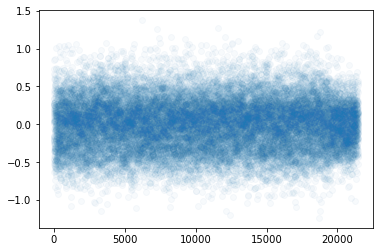

In [114]:
y_hat = lr.predict(Xscaled)
resid = (y_log - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.03);

In [115]:
import sklearn.metrics as metrics

In [116]:
metrics.r2_score(y_log, lr.predict(Xscaled))

0.5818634375128748

In [117]:
avg_quality = np.mean(y_log)
num = len(y_log)

metrics.r2_score(y_log, avg_quality * np.ones(num))

0.0

In [118]:
metrics.r2_score(y_log, (avg_quality + 1) * np.ones(num))

-3.727827667491624

In [119]:
metrics.mean_squared_error(y_log, lr.predict(Xscaled), squared=False)

0.33491234695931854

In [120]:
y_hat = lr.predict(Xscaled)

In [121]:
np.sqrt(mean_squared_error(y_log, y_hat))

0.33491234695931854

## log of features - DROP

In [122]:
#for feat in best_features:
#    data[feat] = data[feat].map(lambda x: np.log(x))
#pd.plotting.scatter_matrix(data[best_features], figsize=(10,12));

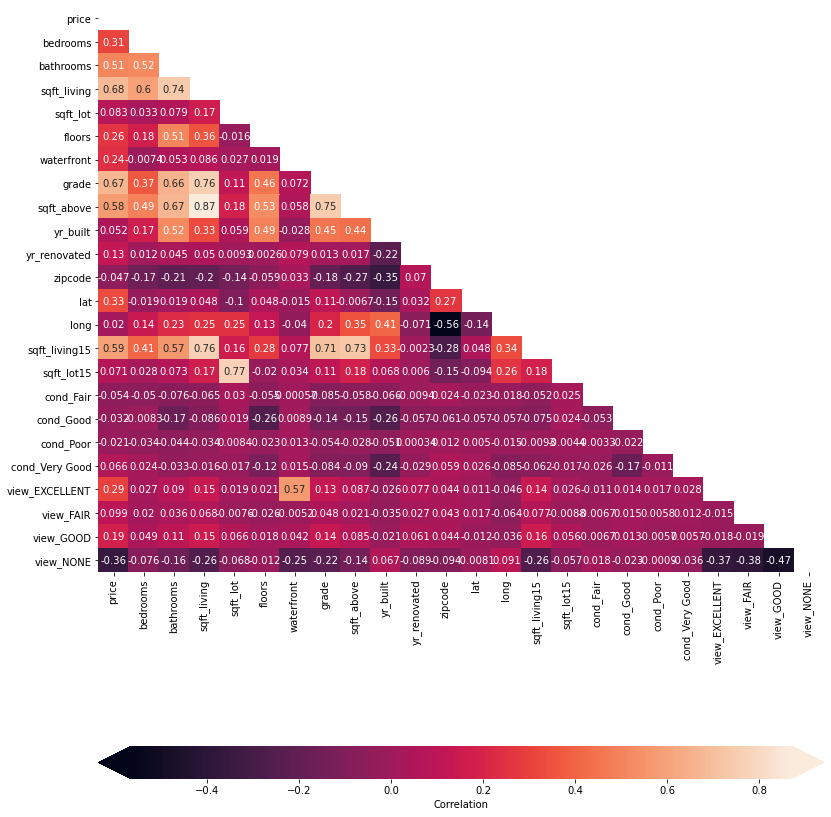

In [135]:
heatmap_data = data
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(13, 16))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

In [124]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.57335067, 0.57550403, 0.58445169])

## Baseline Model

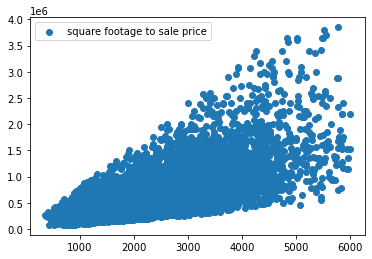

In [136]:
# In statsmodels
plt.scatter(data.sqft_living, data.price, color='tab:blue', label = 'square footage to sale price')
#plt.plot(X, regression_line, label = 'Regession Line')
plt.legend();

In [127]:
x = data.grade
y = data.price
livingmodel = sm.formula.ols(formula='y~x', data=data).fit()
livingmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:53:03   Log-Likelihood:            -2.9715e+05
No. Observations:               21462   AIC:                         5.943e+05
Df Residuals:                   21460   BIC:                         5.943e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.582e+05   1.14e+04    -83.869      0.000   -9.81e+05   -9.36e+05
x            1.95e+05   1477.932    131.952      0.000    1.92e+05    1.98e+05
==============================================================================
Omnibus:                    12942.916   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           221354.073
Skew:                           2.589   Prob(JB):                         0.00
Kurtosis:                      17.856   Cond. No.                         52.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

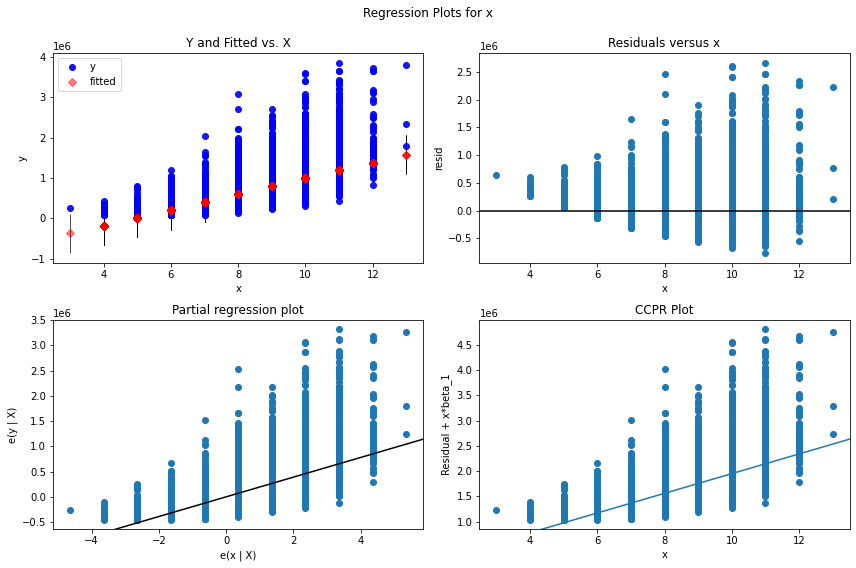

In [128]:
sm.graphics.plot_regress_exog(livingmodel, 'x', fig=plt.figure(figsize=(12, 8)));

In [129]:
#non homoskedacitity

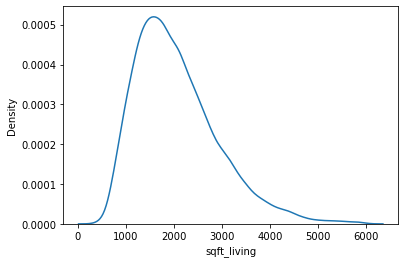

In [130]:
sns.kdeplot(data=data.sqft_living);

In [131]:
outcome = 'price'
cols = ['sqft_living', 'grade', 'bathrooms', 'bedrooms']
predictors = '+'.join(cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     5927.
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:53:05   Log-Likelihood:            -2.9554e+05
No. Observations:               21462   AIC:                         5.911e+05
Df Residuals:                   21457   BIC:                         5.911e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.902e+05   1.42e+04    -34.471      0.000   -5.18e+05   -4.62e+05
sqft_living   196.1557      3.548     55.282      0.000     189.201     203.111
grade        1.037e+05   2199.535     47.168      0.000    9.94e+04    1.08e+05
bathrooms   -2.487e+04   3298.708     -7.538      0.000   -3.13e+04   -1.84e+04
bedrooms    -3.638e+04   2331.483    -15.605      0.000    -4.1e+04   -3.18e+04
==============================================================================
Omnibus:                    11984.118   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188154.117
Skew:                           2.355   Prob(JB):                         0.00
Kurtosis:                      16.720   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""